<a href="https://colab.research.google.com/github/bayanbayrakdar/first-project/blob/main/classification%20Human%20and%20Horse%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip


--2023-12-29 11:09:58--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.207, 108.177.121.207, 172.217.214.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   115MB/s    in 1.2s    

2023-12-29 11:10:00 (115 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2023-12-29 11:10:00--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.207, 108.177.121.207, 172.217.214.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (1

In [2]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [3]:
import os
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [4]:

train_horse_names = os.listdir(train_horse_dir)
print(len(train_horse_names))


train_human_names = os.listdir(train_human_dir)
print(len(train_human_names))

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

500
527
VAL SET HORSES: ['horse6-089.png', 'horse6-064.png', 'horse4-188.png', 'horse5-303.png', 'horse2-224.png', 'horse3-141.png', 'horse4-072.png', 'horse5-589.png', 'horse5-100.png', 'horse4-588.png']
VAL SET HUMANS: ['valhuman03-02.png', 'valhuman02-00.png', 'valhuman04-20.png', 'valhuman01-19.png', 'valhuman01-09.png', 'valhuman03-05.png', 'valhuman01-01.png', 'valhuman03-13.png', 'valhuman05-01.png', 'valhuman03-08.png']


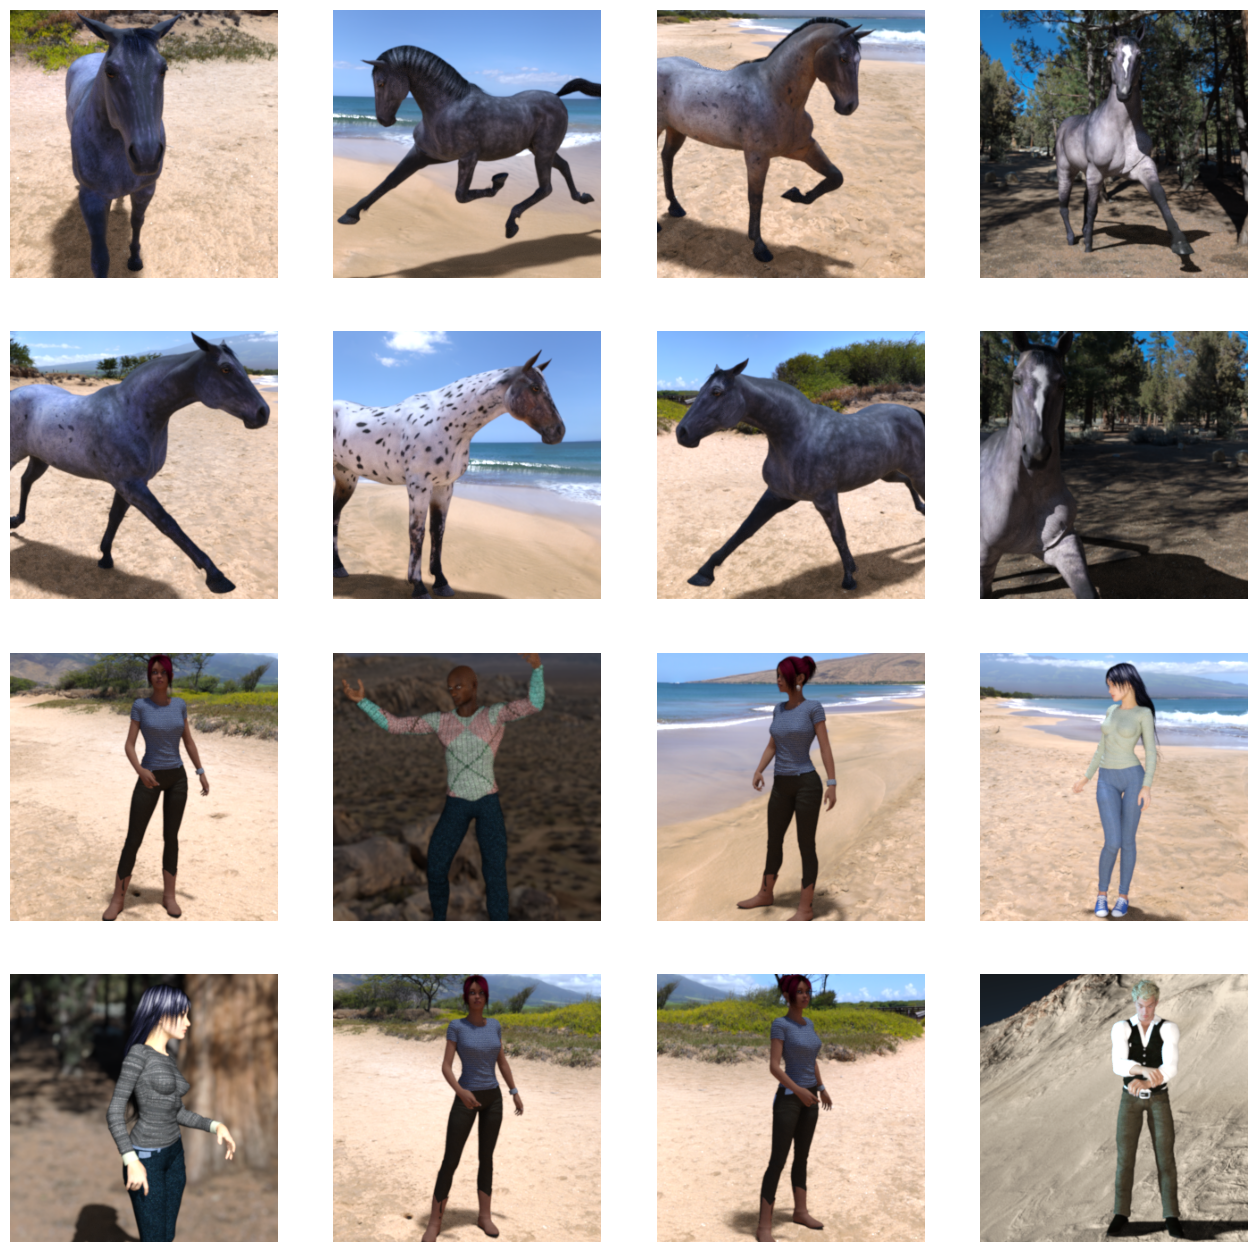

In [9]:
#  plot some pic to get batter sense of what they look like
import matplotlib.pyplot as plt
import matplotlib.image as mg
high=4
width=4
pic_index=8
fig = plt.gcf()
fig.set_size_inches(high*4,width*4)
next_horse_pic=[os.path.join(train_horse_dir,f)
 for f in train_horse_names[pic_index-8:pic_index]]
next_human_pic=[os.path.join(train_human_dir,f)
for f in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pic+next_human_pic):
  sp=plt.subplot(high,width,i+1)
  sp.axis('off')
  im=mg.imread(img_path)
  plt.imshow(im)



In [10]:
import tensorflow as tf
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

I will train the model with the binary_crossentropy loss because it's a binary classification problem
I will use the rmsprop optimizer with a learning rate of 0.001. During training, you will want to monitor classification accuracy.

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

**Data Preprocessing using ImageDataGenerator**




In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#all image will be rescaled
train_data=ImageDataGenerator(rescale=1/255)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_gen=train_data.flow_from_directory('./horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


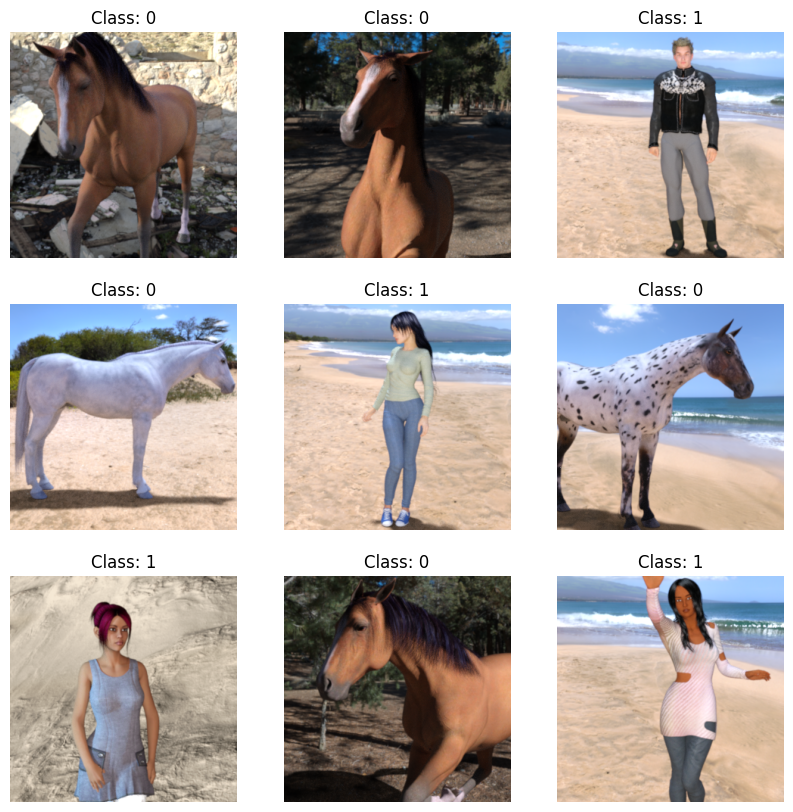

In [13]:
import matplotlib.pyplot as plt

# Get a batch of data from the generator
batch_images, batch_labels = train_gen.next()

# Display a few images from the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f"Class: {int(batch_labels[i])}")
    plt.axis("off")
plt.show()


**Training agter ImageGenrator**

In [14]:
history = model.fit(
      train_gen,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 131s 15s/step - loss: 0.7596 - accuracy: 0.5706 - val_loss: 0.6846 - val_accuracy: 0.5273
Epoch 2/15
8/8 [==============================] - 127s 16s/step - loss: 0.8206 - accuracy: 0.5673 - val_loss: 0.6858 - val_accuracy: 0.5391
Epoch 3/15
8/8 [==============================] - 118s 15s/step - loss: 0.6702 - accuracy: 0.7097 - val_loss: 0.6372 - val_accuracy: 0.8047
Epoch 4/15
8/8 [==============================] - 117s 17s/step - loss: 0.6763 - accuracy: 0.7308 - val_loss: 0.6299 - val_accuracy: 0.6914
Epoch 5/15
8/8 [==============================] - 127s 16s/step - loss: 0.6717 - accuracy: 0.6997 - val_loss: 0.6460 - val_accuracy: 0.5156
Epoch 6/15
8/8 [==============================] - 117s 14s/step - loss: 1.1100 - accuracy: 0.7508 - val_loss: 0.5346 - val_accuracy: 0.7188
Epoch 7/15
8/8 [==============================] - 128s 16s/step - loss: 0.3335 - accuracy: 0.8754 - val_loss: 0.5226 - val_accuracy: 0.8438
Epoch 8/15
8/8 [====

**Model Prediction**
This Code will allow you choose 1 or more fils from your file system to predict if it's a horse or a human


In [23]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
file=files.upload()

for fn in file.keys():
  path='/content/'+fn
  img=load_img(path,target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving woman-3481756_640.jpg to woman-3481756_640 (3).jpg
1/1 [==============================] - 0s 51ms/step
[0.01429785]
woman-3481756_640 (3).jpg is a horse
